In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Instructions
Use the techniques in the lesson to explore the **store item demand** dataset and the **opsd** dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

# Store Item Demand
## Prep

In [2]:
df = pd.read_csv('gulde_all.csv', index_col=0)
df.head(2)

,sale_id,sale_date,sale_amount,item_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_id,store_state,store_city,store_zipcode,store_address
0,1,"Tue, 01 Jan 2013 00:00:00 GMT",13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,TX,San Antonio,78253,12125 Alamo Ranch Pkwy
1,2,"Wed, 02 Jan 2013 00:00:00 GMT",11.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,TX,San Antonio,78253,12125 Alamo Ranch Pkwy


In [3]:
# check if each observation's date is unique
print('Total length:', len(df))
print('Number of uniques:', len(df.sale_date.unique()))

Total length: 913000
Number of uniques: 1826


In [4]:
# check further
print(df.sale_date.dtype)

object


In [5]:
# convert to datetime format, set it to index, drop column
df['sale_date'] = df.sale_date.astype('datetime64')
df.index = df.sale_date
df = df.drop(columns='sale_date')
df.head(2)

,sale_id,sale_amount,item_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_id,store_state,store_city,store_zipcode,store_address
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,TX,San Antonio,78253,12125 Alamo Ranch Pkwy
2013-01-02,2,11.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,TX,San Antonio,78253,12125 Alamo Ranch Pkwy


In [6]:
# check dates to see precision
print(df.index.hour.unique())
print(df.index.day.unique())

Int64Index([0], dtype='int64', name='sale_date')
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='sale_date')


In [7]:
# create new dataframe resampled to day
daily_df = df[['sale_amount']].resample('D').sum()
daily_df.sample(3)

,sale_amount
sale_date,
2013-01-28,11848.0
2014-12-31,17238.0
2013-10-30,19854.0


## Split

<AxesSubplot:xlabel='sale_date'>

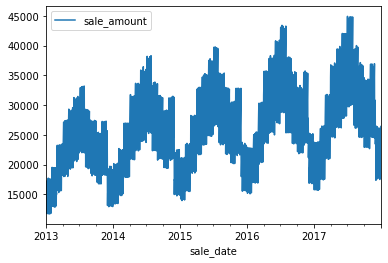

In [8]:
# check for cycle
daily_df.plot()

In [9]:
# there are 5 cycles; splitting train into first 4, test into last 1
# fix dtype
daily_df['sale_amount'] = daily_df.sale_amount.astype('int')
# split
train = daily_df[daily_df.index.year < 2017]
test = daily_df[daily_df.index.year >= 2017]
# check split
train.shape[0] + test.shape[0] == daily_df.shape[0]

True

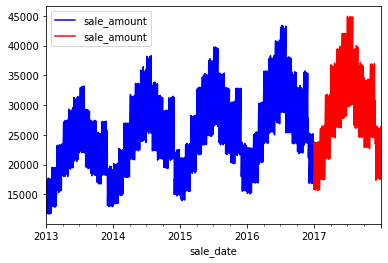

In [10]:
# check split distribution
ax = train.plot(c='blue')
test.plot(ax=ax, c='red')
plt.show()

## Explore

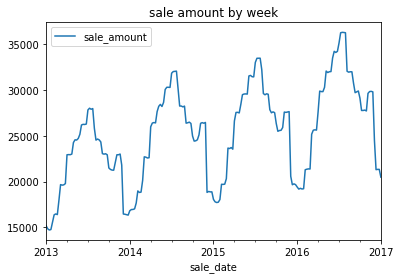

In [11]:
train.resample('W').mean().plot()
plt.title('sale amount by week')
plt.show()

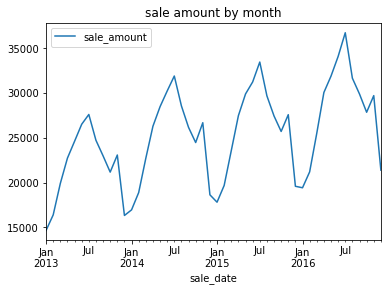

In [12]:
train.resample('M').mean().plot()
plt.title('sale amount by month')
plt.show()

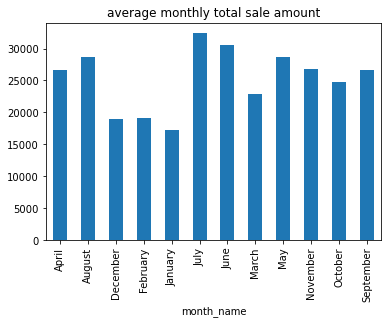

In [13]:
train['month_name'] = train.index.month_name()
train.groupby('month_name').sale_amount.mean().plot.bar()
plt.title('average monthly total sale amount')
plt.show()
train = train.drop(columns='month_name')

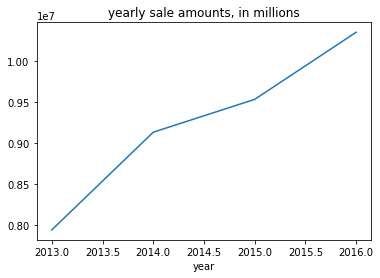

In [14]:
train['year'] = train.index.year
train.groupby('year').sale_amount.sum().plot()
plt.title('yearly sale amounts, in millions')
plt.show()
train = train.drop(columns='year')

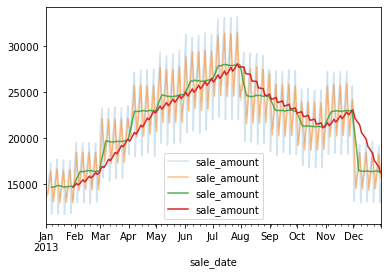

In [15]:
ax = train[train.index.year == 2013].plot(alpha=.2, label='Hourly')
train[train.index.year == 2013].resample('D').mean().rolling(3).mean().plot(ax=ax, alpha=.5, label='3 day')
train[train.index.year == 2013].resample('D').mean().rolling(7).mean().plot(ax=ax, alpha=.8, label='1 week')
train[train.index.year == 2013].resample('D').mean().rolling(30).mean().plot(ax=ax, alpha=1, label='30 days')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Average monthly change in sale amount'}, xlabel='sale_date'>

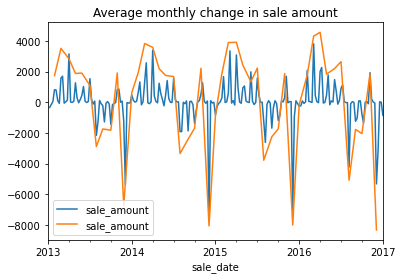

In [16]:
ax = train.resample('W').mean().diff().plot(title='Average week-to-week change in sale amount')
train.resample('M').mean().diff().plot(ax=ax, title='Average monthly change in sale amount')